# Exercises: Time Series Acquisition

<hr style="border:2px solid gray">

Create a new local git repository and remote repository on github named time-series-exercises. Save this work for this module in your time-series-exercises repo.

The end result of this exercise should be a file named acquire.py.

1. Using the code from the lesson as a guide and the REST API from https://swapi.dev/ as we did in the lesson, create a dataframe named people that has all of the data for people.
2. Do the same thing, but for planets.
3. Extract the data for starships.
4. Save the data in your files to local csv files so that it will be faster to access in the future.
5. Combine the data from your three separate dataframes into one large dataframe.
6. Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.

In [1]:
#standard ds imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#imports
import os
import requests
import datetime
import acquire

#set figure size
plt.rcParams["figure.figsize"] = (8,6)

#specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<hr style="border:1px solid black">
<hr style="border:1px solid black">

### #1.  Using the code from the lesson as a guide and the REST API from https://swapi.dev/ as we did in the lesson, create a dataframe named people that has all of the data for people.

In [2]:
#assign the api that we requested to a variable
response = requests.get('https://swapi.dev/api/people/')

#Let's look at the type of response we get
response

<Response [200]>

<div class="alert alert-block alert-info">
<b>Note:</b> 
<br>

The following are some "responses" that you may see when requesting APIs.

- 200- 206: Successful

- 401: Unauthorized

- 404: Not Found

- 500: Internal Server Error

</div>

In [3]:
#assign data to the successful response (200)
data = response.json()

#take a look at the json
data

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

![Key Value Pairs](key_value_pairs.png)

![JSON Structure](json_structure.png)

<div class="alert alert-block alert-info">
<b>Note:</b> 
<br>

- 'next' refers to: next_page = data['next']
<br>

- 'results' refers to: the part of the json object that contains the information we are looking for

</div>

In [4]:
#create the dataframe  
people_df = pd.DataFrame(data['results'])

#take a look at the dataframe
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        10 non-null     object
 1   height      10 non-null     object
 2   mass        10 non-null     object
 3   hair_color  10 non-null     object
 4   skin_color  10 non-null     object
 5   eye_color   10 non-null     object
 6   birth_year  10 non-null     object
 7   gender      10 non-null     object
 8   homeworld   10 non-null     object
 9   films       10 non-null     object
 10  species     10 non-null     object
 11  vehicles    10 non-null     object
 12  starships   10 non-null     object
 13  created     10 non-null     object
 14  edited      10 non-null     object
 15  url         10 non-null     object
dtypes: object(16)
memory usage: 1.4+ KB


In [5]:
#as long as there is another page..
while data['next'] != None:
    #print that next page
    print(data['next'])
    #make our response variable the api
    response = requests.get(data['next'])
    #with the information from our json 
    data = response.json()
    #now, combine our dataframe with all pages
    people_df = pd.concat([people_df, pd.DataFrame(data['results'])], ignore_index=True)

https://swapi.dev/api/people/?page=2
https://swapi.dev/api/people/?page=3
https://swapi.dev/api/people/?page=4
https://swapi.dev/api/people/?page=5
https://swapi.dev/api/people/?page=6
https://swapi.dev/api/people/?page=7
https://swapi.dev/api/people/?page=8
https://swapi.dev/api/people/?page=9


In [6]:
#take a look
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        82 non-null     object
 1   height      82 non-null     object
 2   mass        82 non-null     object
 3   hair_color  82 non-null     object
 4   skin_color  82 non-null     object
 5   eye_color   82 non-null     object
 6   birth_year  82 non-null     object
 7   gender      82 non-null     object
 8   homeworld   82 non-null     object
 9   films       82 non-null     object
 10  species     82 non-null     object
 11  vehicles    82 non-null     object
 12  starships   82 non-null     object
 13  created     82 non-null     object
 14  edited      82 non-null     object
 15  url         82 non-null     object
dtypes: object(16)
memory usage: 10.4+ KB


<div class="alert alert-block alert-success">
<b>Takeaways:</b>
<br>
    
- Concatinating the additional pages onto the dataframe changed the shape from 10 entries (1 page) to 82 entries (9 pages). 
</div>

<hr style="border:1px solid black">
<hr style="border:1px solid black">

### #2. Do the same thing, but for planets.

In [7]:
#request planets api
response = requests.get('https://swapi.dev/api/planets/')
data = response.json()

In [8]:
#turn 'data' within the json into a dataframe
planet_df = pd.DataFrame(data['results'])

In [9]:
#look at planets df
planet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             10 non-null     object
 1   rotation_period  10 non-null     object
 2   orbital_period   10 non-null     object
 3   diameter         10 non-null     object
 4   climate          10 non-null     object
 5   gravity          10 non-null     object
 6   terrain          10 non-null     object
 7   surface_water    10 non-null     object
 8   population       10 non-null     object
 9   residents        10 non-null     object
 10  films            10 non-null     object
 11  created          10 non-null     object
 12  edited           10 non-null     object
 13  url              10 non-null     object
dtypes: object(14)
memory usage: 1.2+ KB


In [10]:
while data['next'] != None:
    print(data['next'])
    response = requests.get(data['next'])
    data = response.json()
    planet_df = pd.concat([planet_df, pd.DataFrame(data['results'])], ignore_index=True)

https://swapi.dev/api/planets/?page=2
https://swapi.dev/api/planets/?page=3
https://swapi.dev/api/planets/?page=4
https://swapi.dev/api/planets/?page=5
https://swapi.dev/api/planets/?page=6


In [11]:
planet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             60 non-null     object
 1   rotation_period  60 non-null     object
 2   orbital_period   60 non-null     object
 3   diameter         60 non-null     object
 4   climate          60 non-null     object
 5   gravity          60 non-null     object
 6   terrain          60 non-null     object
 7   surface_water    60 non-null     object
 8   population       60 non-null     object
 9   residents        60 non-null     object
 10  films            60 non-null     object
 11  created          60 non-null     object
 12  edited           60 non-null     object
 13  url              60 non-null     object
dtypes: object(14)
memory usage: 6.7+ KB


<div class="alert alert-block alert-success">
<b>Takeaways:</b>
<br>
    
- Concatinating the additional pages onto the dataframe changed the shape from 10 entries (1 page), to 60 entries (6 pages)
</div>

<hr style="border:1px solid black">
<hr style="border:1px solid black">

### #3. Extract the data for starships.

In [12]:
#request starships api
response = requests.get('https://swapi.dev/api/starships/')
data = response.json()

In [13]:
#turn that into a dataframe
starships_df = pd.DataFrame(data['results'])
#take a look
starships_df.info()
starships_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    10 non-null     object
 1   model                   10 non-null     object
 2   manufacturer            10 non-null     object
 3   cost_in_credits         10 non-null     object
 4   length                  10 non-null     object
 5   max_atmosphering_speed  10 non-null     object
 6   crew                    10 non-null     object
 7   passengers              10 non-null     object
 8   cargo_capacity          10 non-null     object
 9   consumables             10 non-null     object
 10  hyperdrive_rating       10 non-null     object
 11  MGLT                    10 non-null     object
 12  starship_class          10 non-null     object
 13  pilots                  10 non-null     object
 14  films                   10 non-null     object
 15  created  

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/


In [14]:
while data['next'] != None:
    print(data['next'])
    response = requests.get(data['next'])
    data = response.json()
    starships_df = pd.concat([starships_df, pd.DataFrame(data['results'])], ignore_index=True)

https://swapi.dev/api/starships/?page=2
https://swapi.dev/api/starships/?page=3
https://swapi.dev/api/starships/?page=4


In [15]:
starships_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    36 non-null     object
 1   model                   36 non-null     object
 2   manufacturer            36 non-null     object
 3   cost_in_credits         36 non-null     object
 4   length                  36 non-null     object
 5   max_atmosphering_speed  36 non-null     object
 6   crew                    36 non-null     object
 7   passengers              36 non-null     object
 8   cargo_capacity          36 non-null     object
 9   consumables             36 non-null     object
 10  hyperdrive_rating       36 non-null     object
 11  MGLT                    36 non-null     object
 12  starship_class          36 non-null     object
 13  pilots                  36 non-null     object
 14  films                   36 non-null     object
 15  created 

<hr style="border:1px solid black">
<hr style="border:1px solid black">

### #4. Save the data in your files to local csv files so that it will be faster to access in the future.

<b> Found in ```acquire.py```</b>
https://github.com/CodeupClassroom/noether-time-series-exercises/blob/main/acquire.py

In [28]:
starship = acquire.get_starships_data()
starship.head(3)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",NaN,36000000,2 years,2.0,60,Star Destroyer,[],"['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],['https://swapi.dev/api/films/1/'],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/


In [29]:
people = acquire.get_people_data()
people.head(3)

https://swapi.dev/api/people/?page=2
https://swapi.dev/api/people/?page=3
https://swapi.dev/api/people/?page=4
https://swapi.dev/api/people/?page=5
https://swapi.dev/api/people/?page=6
https://swapi.dev/api/people/?page=7
https://swapi.dev/api/people/?page=8
https://swapi.dev/api/people/?page=9


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/


In [30]:
planet = acquire.get_planet_data()
planet.sample(3)

https://swapi.dev/api/planets/?page=2
https://swapi.dev/api/planets/?page=3
https://swapi.dev/api/planets/?page=4
https://swapi.dev/api/planets/?page=5
https://swapi.dev/api/planets/?page=6


,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
28,Trandosha,25,371,0,arid,0.62 standard,"mountains, seas, grasslands, deserts",unknown,42000000,[https://swapi.dev/api/people/24/],[],2014-12-15T12:53:47.695000Z,2014-12-20T20:58:18.468000Z,https://swapi.dev/api/planets/29/
53,Zolan,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,[https://swapi.dev/api/people/70/],[],2014-12-20T16:56:37.250000Z,2014-12-20T20:58:18.514000Z,https://swapi.dev/api/planets/54/
41,Haruun Kal,25,383,10120,temperate,0.98,"toxic cloudsea, plateaus, volcanoes",unknown,705300,[https://swapi.dev/api/people/51/],[],2014-12-20T10:12:28.980000Z,2014-12-20T20:58:18.491000Z,https://swapi.dev/api/planets/42/


<hr style="border:1px solid black">
<hr style="border:1px solid black">

### #5. Combine the data from your three separate dataframes into one large dataframe.

In [18]:
starplanet_df = pd.concat([starships_df, planet_df], axis = 0)
starplanet_df.head(3)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,...,url,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,...,https://swapi.dev/api/starships/2/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,...,https://swapi.dev/api/starships/3/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,...,https://swapi.dev/api/starships/5/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ugly_df = pd.concat([starplanet_df, people_df], axis=0)
ugly_df.head(3)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,...,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,vehicles,starships
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<hr style="border:1px solid black">
<hr style="border:1px solid black">

### #6. Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years.

In [21]:
germany = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [22]:
germany.sample(5)

,Date,Consumption,Wind,Solar,Wind+Solar
4370,2017-12-19,1586.48,99.10,8.79,107.89
1549,2010-03-30,1329.16,137.35,NaN,NaN
1370,2009-10-02,1324.85,NaN,NaN,NaN
1530,2010-03-11,1580.81,39.17,NaN,NaN
1624,2010-06-13,1023.97,53.09,NaN,NaN


In [23]:
#set date as index and sort
germany = germany.set_index('Date').sort_index()

In [24]:
germany.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18,NaN,NaN,NaN
2006-01-02,1380.52,NaN,NaN,NaN
2006-01-03,1442.53,NaN,NaN,NaN


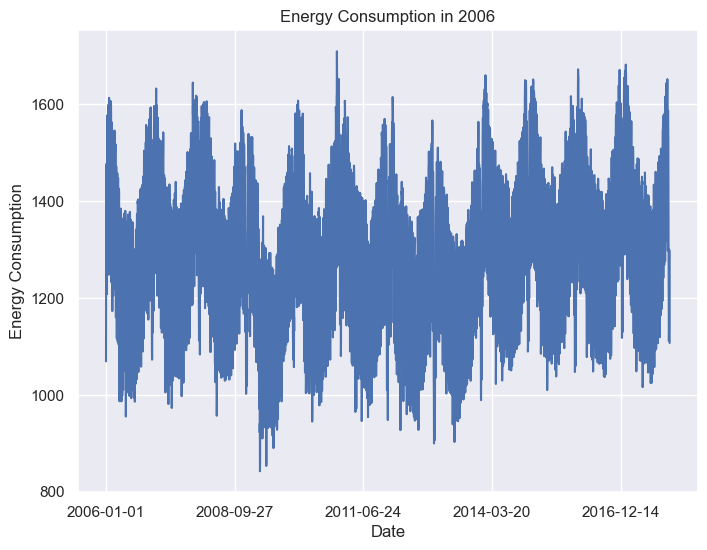

In [25]:
germany.Consumption.plot()
plt.title('Energy Consumption in 2006')
plt.ylabel('Energy Consumption')
plt.show()

<hr style="border:1px solid black">
<hr style="border:1px solid black">

### #7. Make sure all the work that you have done above is reproducible